# DATA ANALYSIS AND VISUALIZATION WITH PANDAS AND MATPLOTLIB

Importing libraries. The matplotlib library was mostly used for this project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
df = pd.read_excel(r'C:/Users/MY-PC/Documents/new file/energy.xlsx')
df

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [42]:
df.columns

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption(quad Btu)',
       'Energy_production(quad Btu)', 'GDP(Billions)', 'Population',
       'Energy_intensity_per_capita(MMBtu/person)',
       'Energy_intensity_by_GDP(1000 Btu/GDP)', 'CO2_emission(MMtonnes)'],
      dtype='object')

In [43]:
df.dtypes

Country                                       object
Energy_type                                   object
Year                                           int64
Energy_consumption(quad Btu)                 float64
Energy_production(quad Btu)                  float64
GDP(Billions)                                float64
Population                                   float64
Energy_intensity_per_capita(MMBtu/person)    float64
Energy_intensity_by_GDP(1000 Btu/GDP)        float64
CO2_emission(MMtonnes)                       float64
dtype: object

In [85]:
df.drop(columns=['Population', 'Energy_type'])

,Country,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
0,World,1980,292.899790,296.337228,27770.910281,68.145921,10.547000,4946.627130
1,World,1980,78.656134,80.114194,27770.910281,68.145921,10.547000,1409.790188
2,World,1980,53.865223,54.761046,27770.910281,68.145921,10.547000,1081.593377
3,World,1980,132.064019,133.111109,27770.910281,68.145921,10.547000,2455.243565
4,World,1980,7.575700,7.575700,27770.910281,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...
55435,Zimbabwe,2019,0.045064,0.075963,37.620400,11.508701,4.482962,4.586869
55436,Zimbabwe,2019,0.000000,0.000000,37.620400,11.508701,4.482962,0.000000
55437,Zimbabwe,2019,0.055498,0.000000,37.620400,11.508701,4.482962,4.377890
55438,Zimbabwe,2019,NaN,NaN,37.620400,11.508701,4.482962,0.000000


In [45]:
df.isnull().sum() # returns sum of all null values

Country                                          0
Energy_type                                      0
Year                                             0
Energy_consumption(quad Btu)                 11153
Energy_production(quad Btu)                  11151
GDP(Billions)                                15414
Population                                    9426
Energy_intensity_per_capita(MMBtu/person)     5082
Energy_intensity_by_GDP(1000 Btu/GDP)         5082
CO2_emission(MMtonnes)                        3826
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    55440 non-null  object 
 1   Energy_type                                55440 non-null  object 
 2   Year                                       55440 non-null  int64  
 3   Energy_consumption(quad Btu)               44287 non-null  float64
 4   Energy_production(quad Btu)                44289 non-null  float64
 5   GDP(Billions)                              40026 non-null  float64
 6   Population                                 46014 non-null  float64
 7   Energy_intensity_per_capita(MMBtu/person)  50358 non-null  float64
 8   Energy_intensity_by_GDP(1000 Btu/GDP)      50358 non-null  float64
 9   CO2_emission(MMtonnes)                     51614 non-null  float64
dtypes: float64(7), int64(1

In [48]:
df.corr()

,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
Year,1.000000,0.018623,0.018297,0.025243,0.015489,0.073305,0.109403,0.016484
Energy_consumption(quad Btu),0.018623,1.000000,0.993413,0.705119,0.696654,0.041394,0.061869,0.982828
Energy_production(quad Btu),0.018297,0.993413,1.000000,0.700921,0.696751,0.046595,0.064739,0.975563
GDP(Billions),0.025243,0.705119,0.700921,1.000000,0.945365,0.037068,0.035213,0.673966
Population,0.015489,0.696654,0.696751,0.945365,1.000000,-0.014327,0.064579,0.667722
Energy_intensity_per_capita(MMBtu/person),0.073305,0.041394,0.046595,0.037068,-0.014327,1.000000,0.358187,0.033943
Energy_intensity_by_GDP(1000 Btu/GDP),0.109403,0.061869,0.064739,0.035213,0.064579,0.358187,1.000000,0.059532
CO2_emission(MMtonnes),0.016484,0.982828,0.975563,0.673966,0.667722,0.033943,0.059532,1.000000


In [49]:
df.describe()

,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
count,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


In [50]:
df.shape

(55440, 10)

# Visualization

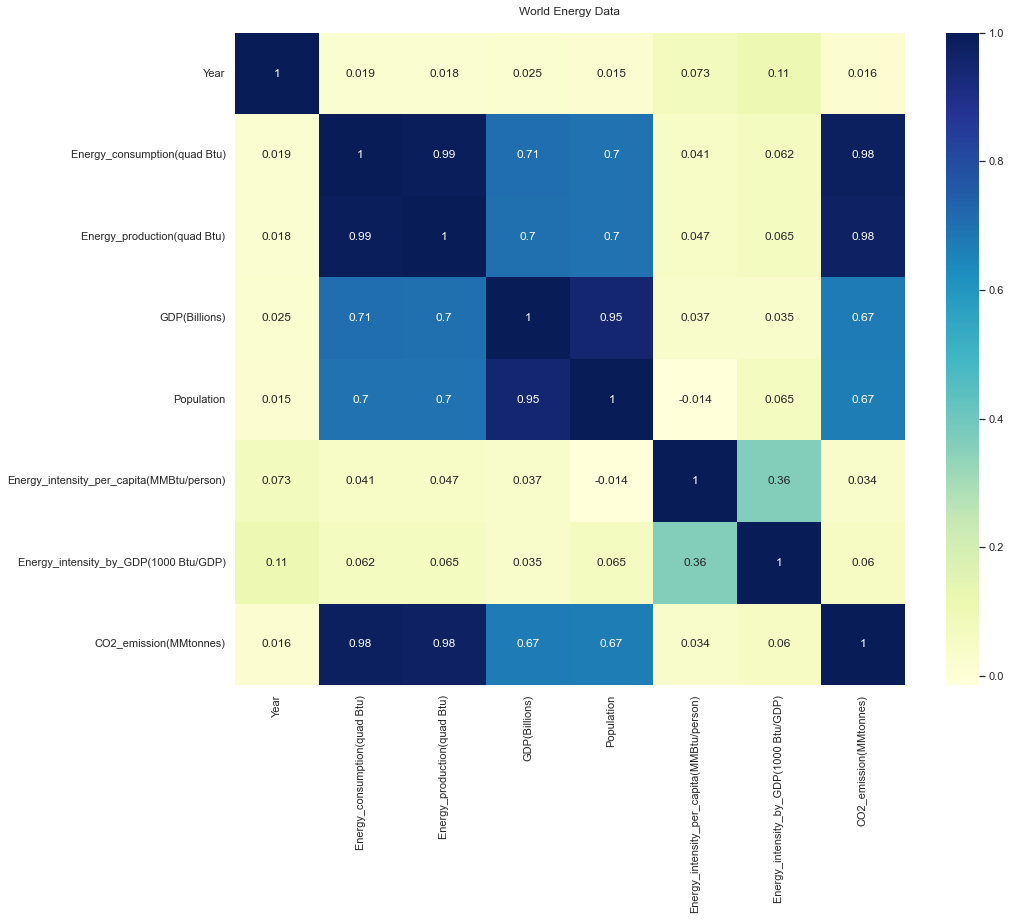

In [62]:
plt.figure(figsize=(15,12))
hm = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
hm.set(title='World Energy Data\n')
plt.show()
# This shows the correlation between features

In [63]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
Year,1.000000,0.018623,0.018297,0.025243,0.015489,0.073305,0.109403,0.016484
Energy_consumption(quad Btu),0.018623,1.000000,0.993413,0.705119,0.696654,0.041394,0.061869,0.982828
Energy_production(quad Btu),0.018297,0.993413,1.000000,0.700921,0.696751,0.046595,0.064739,0.975563
GDP(Billions),0.025243,0.705119,0.700921,1.000000,0.945365,0.037068,0.035213,0.673966
Population,0.015489,0.696654,0.696751,0.945365,1.000000,-0.014327,0.064579,0.667722
Energy_intensity_per_capita(MMBtu/person),0.073305,0.041394,0.046595,0.037068,-0.014327,1.000000,0.358187,0.033943
Energy_intensity_by_GDP(1000 Btu/GDP),0.109403,0.061869,0.064739,0.035213,0.064579,0.358187,1.000000,0.059532
CO2_emission(MMtonnes),0.016484,0.982828,0.975563,0.673966,0.667722,0.033943,0.059532,1.000000


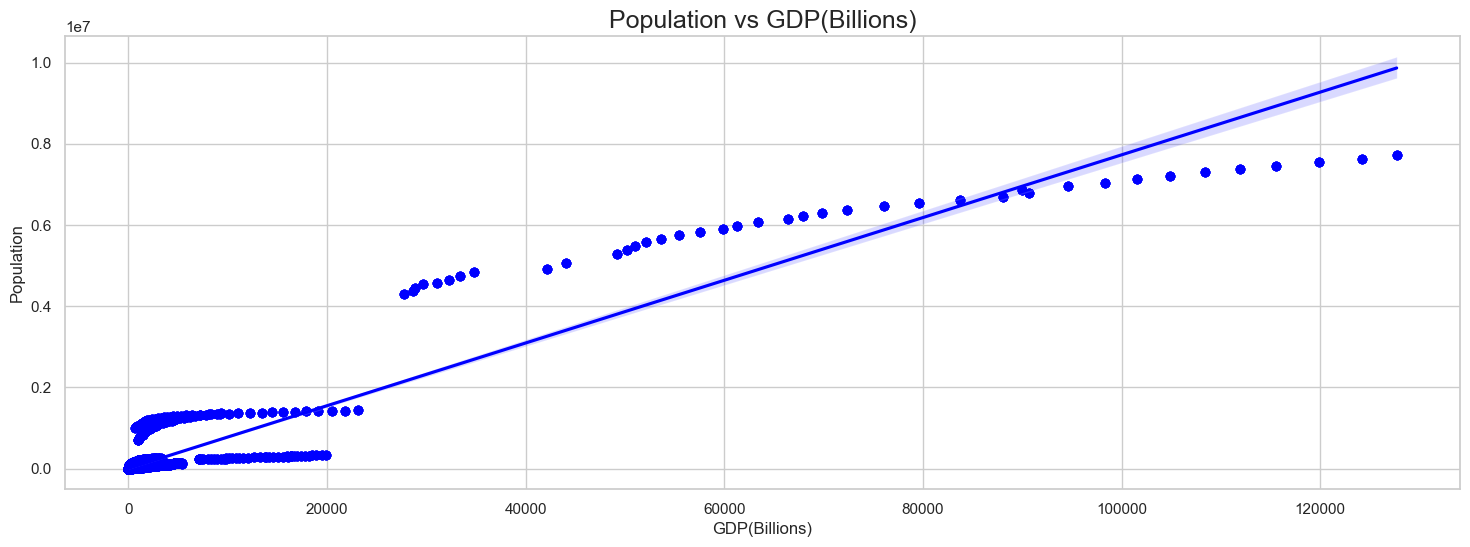

In [68]:
plt.figure(figsize=(18, 6), dpi=100)
sns.set(style='whitegrid')
sns.regplot(x='GDP(Billions)', y='Population', data=df, color='blue')
plt.xlabel('GDP(Billions)')
plt.ylabel('Population')
plt.title('Population vs GDP(Billions)', fontsize=18)
plt.show()

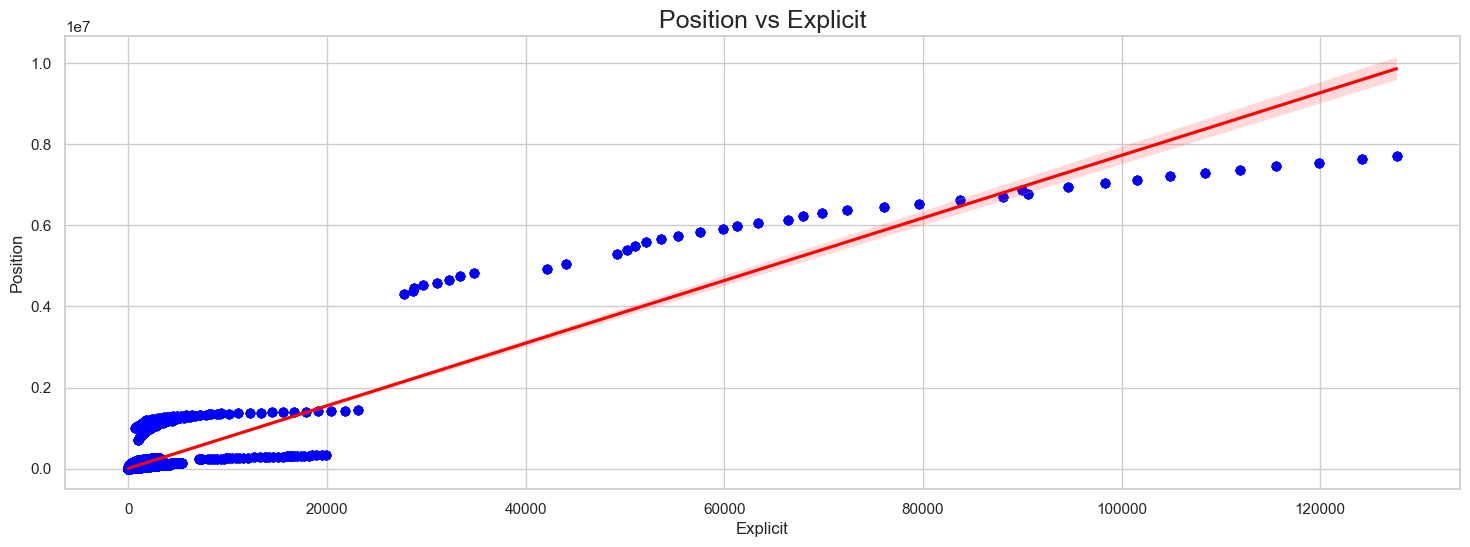

In [69]:
plt.figure(figsize=(18, 6), dpi=100)
sns.regplot(x='GDP(Billions)', y='Population', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Explicit')
plt.ylabel('Position')
plt.title('Position vs Explicit', fontsize=18)
plt.show()

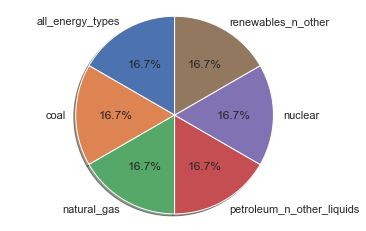

In [70]:
def pie_chart(dataframe):
    labels = dataframe.index.values
    sizes = dataframe['Energy_type'].values
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()
    
count = pd.DataFrame(df.Energy_type.value_counts())
pie_chart(count)

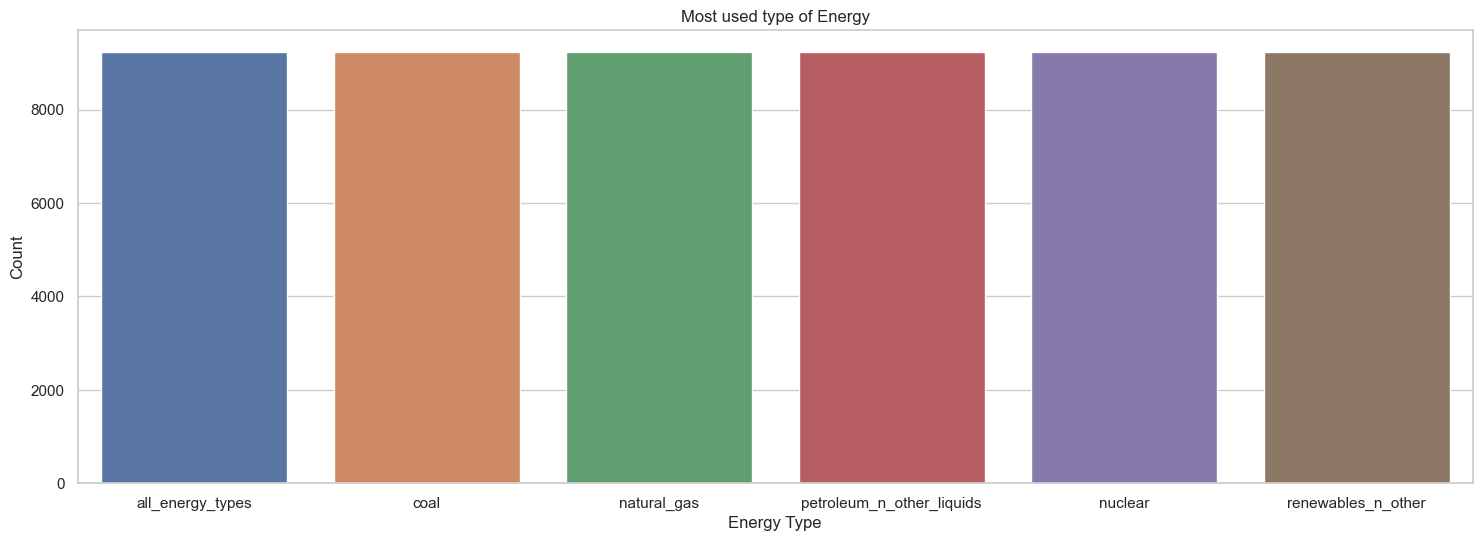

In [82]:
plt.figure(figsize=(18, 6), dpi=100)
sns.countplot(df['Energy_type'])
plt.xlabel('Energy Type')
plt.ylabel('Count')
plt.title('Most used type of Energy')

plt.show()


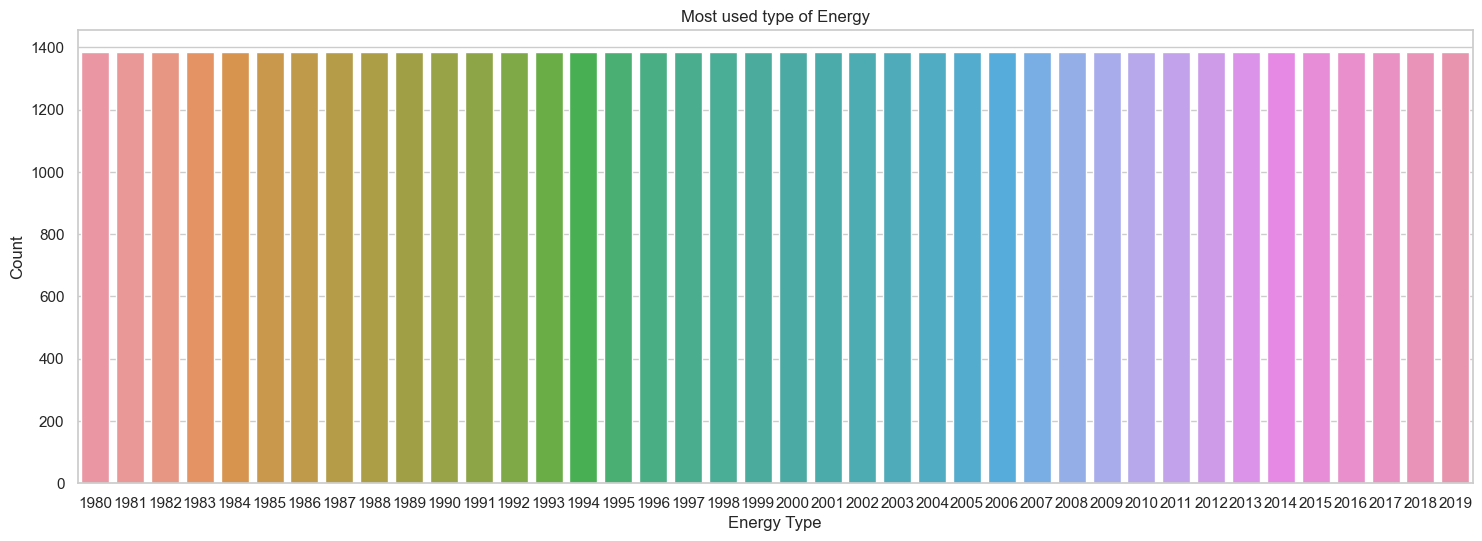

In [83]:
plt.figure(figsize=(18, 6), dpi=100)
sns.countplot(df['Year'])
plt.xlabel('Energy Type')
plt.ylabel('Count')
plt.title('Most used type of Energy')

plt.show()

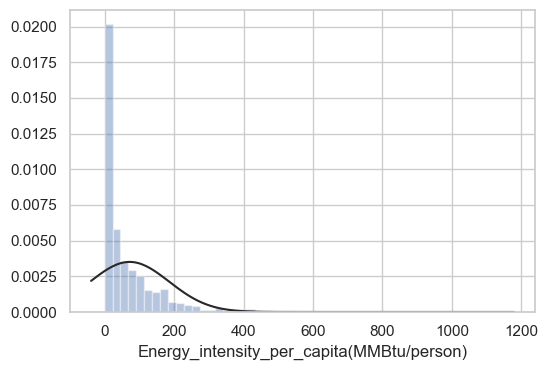

In [88]:
plt.figure(dpi=100)
Energy_intensity_per_capita = df['Energy_intensity_per_capita(MMBtu/person)']
sns.distplot(Energy_intensity_by_GDP, fit = norm, kde=False)
plt.show()

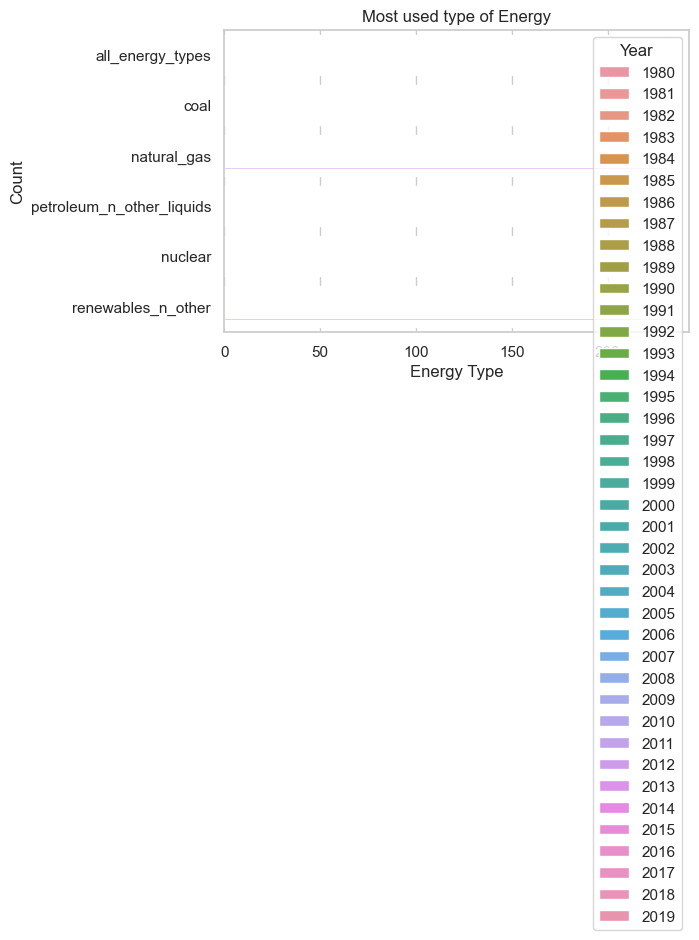

In [107]:
plt.figure(dpi=100)
sns.countplot(y='Energy_type', hue= 'Year', data = df)
plt.xlabel('Energy Type')
plt.ylabel('Count')
plt.title('Most used type of Energy')

plt.show()

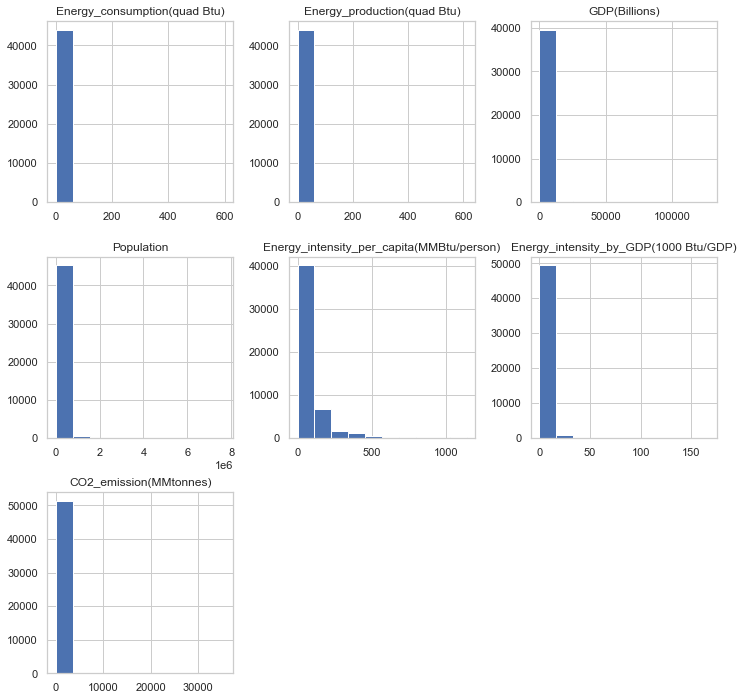

In [112]:
sales_Analyst = df.iloc[:,df.columns !='Year']
sales_Analyst.hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='Energy_consumption(quad Btu)', ylabel='Density'>

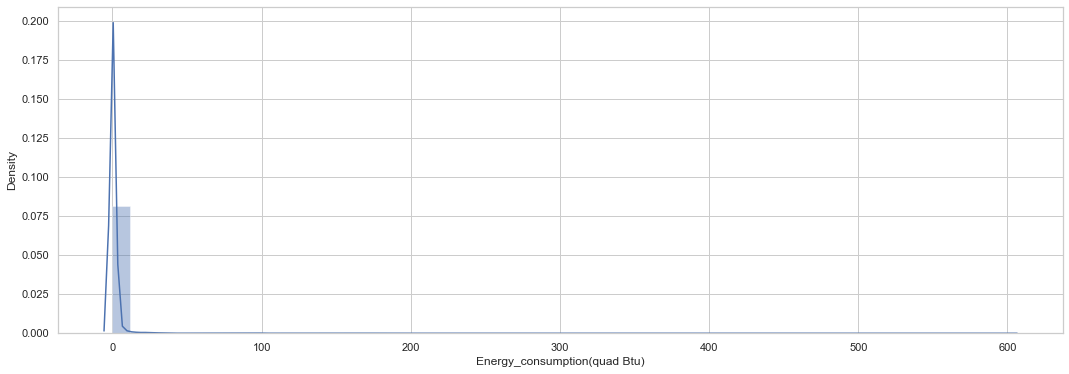

In [115]:
plt.figure(figsize=(18, 6))
sns.distplot(df['Energy_consumption(quad Btu)'])

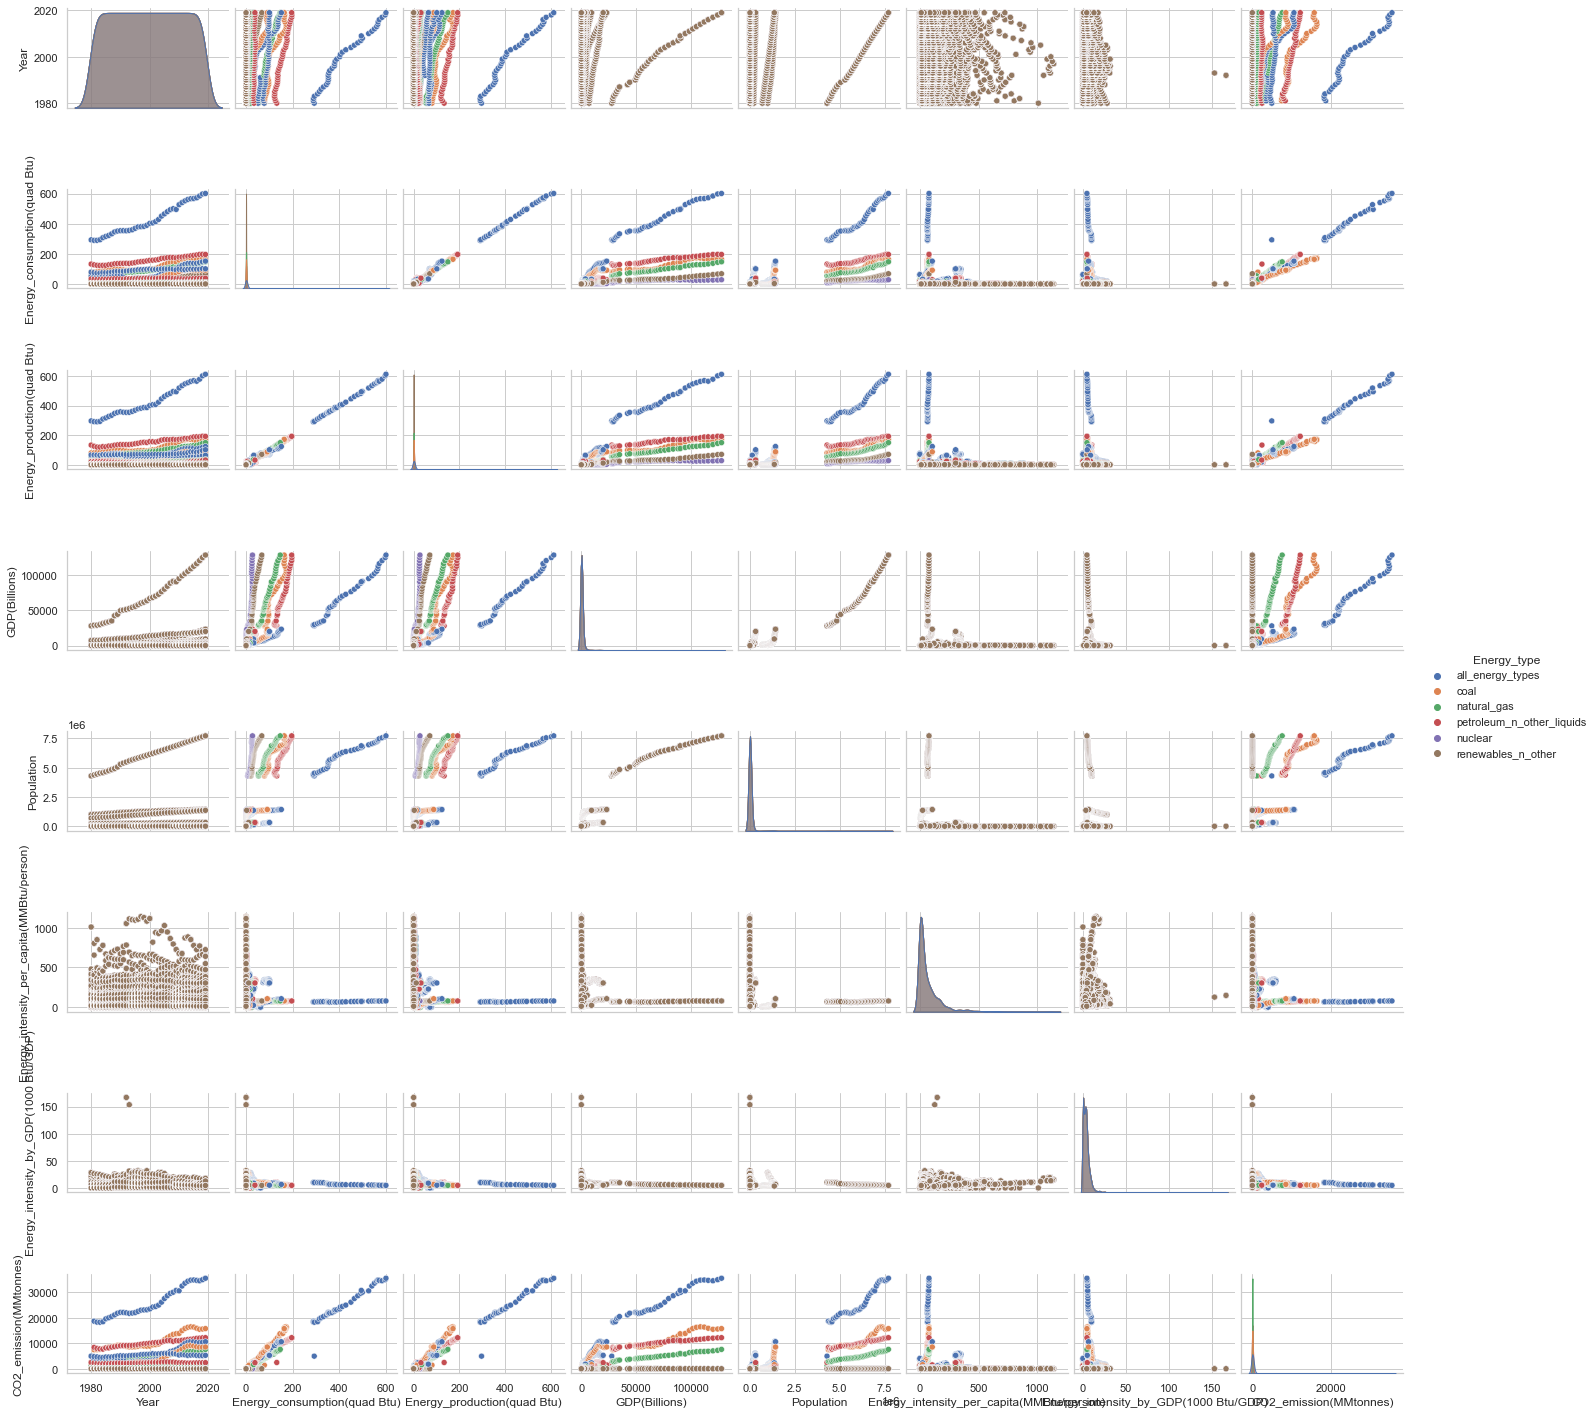

In [119]:
sns.pairplot(df,hue='Energy_type')
plt.show()

<AxesSubplot:xlabel='count', ylabel='Energy_type'>

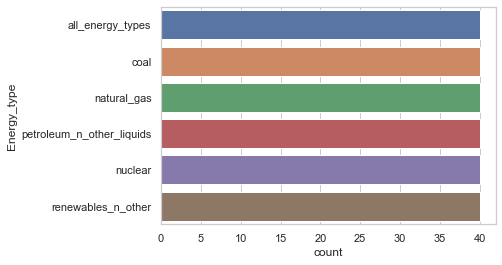

In [126]:
country = df[df.Country == 'United Kingdom']
sns.countplot(y= 'Energy_type', data = country)

# THANK YOU 👍👍👍